# Prophet TS Analysis for Heath and Self

Code Adapted from https://facebook.github.io/prophet/docs/quick_start.html#python-api

## Libraries and Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

import warnings
warnings.filterwarnings('ignore')

In [2]:
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [3]:
# which user?
data_directory = '../data/apple_watch_01/'
# data_directory = '../data/fitbit_01/'
# data_directory = '../data/fitbit_02/'

# which data point?
# datapoint = "steps"
datapoint = "sleep"
path = data_directory+"daily_"+datapoint+".csv"

# import
# series = pd.Series.from_csv(path, header=0)
# series = series.tail(364)
# series.index = pd.to_datetime(series.index)

df = pd.read_csv(path)
df = df.tail(364)

# df.drop(columns=['Hours'], inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.columns = ["ds", "y"]

# df.head()

## Modeling and Forecasting

In [4]:
# # create and fit prophet model
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [6]:
future = m.make_future_dataframe(periods=365) # 365 days
future.tail()

,ds
724,2020-08-07
725,2020-08-08
726,2020-08-09
727,2020-08-10
728,2020-08-11


In [7]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
724,2020-08-07,420.541800,307.288651,523.361525
725,2020-08-08,438.489004,335.525851,545.430616
726,2020-08-09,433.290094,333.280821,528.692301
727,2020-08-10,415.622999,316.542335,517.962748
728,2020-08-11,449.010685,345.559158,547.691875


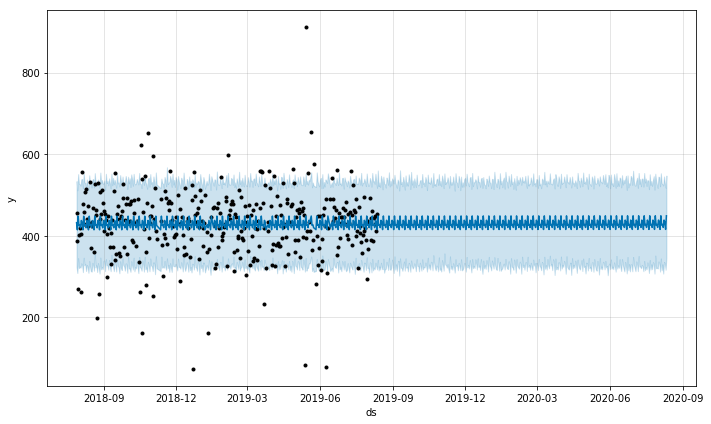

In [8]:
fig1 = m.plot(forecast)

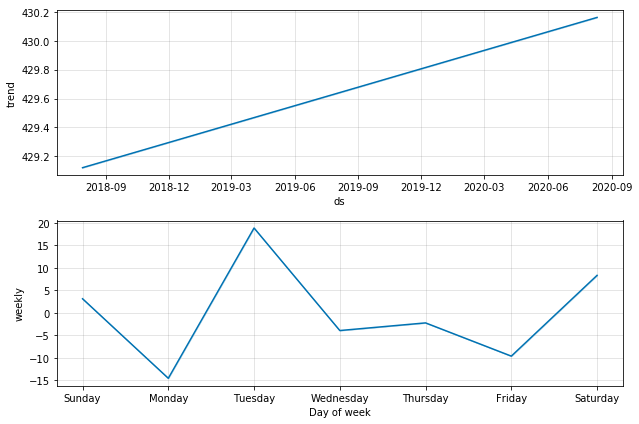

In [9]:
fig2 = m.plot_components(forecast)
